In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Get data
amz = pd.read_csv("amazon_cells_labelled.txt", delimiter='\t', header=None)
amz.columns = ['title', 'sentiment']

In [3]:
# Try to track keywords that has relationship to positive reviews
keywords = ['good', 'great', 'impressed', 'loved', 'best', 'excellent', 'love', 'right', 'outperform', 'pleased', 'done', 'incredible', 'better', 'recommend', 'reasonable', 'fine', 'worth', 'perfectly', 'glad', 'easy', 'comfortable', 'joy', 'recommend', 'ok', 'easier', 'beautiful', 'fulfills', 'cool', 'very', 'extremely', 'outperform', '10', 'stars', 'increase', 'flawlessly', 'surprised', 'charm', 'wanted', 'finally', 'works']
# Convert dataframe to string
amz['title'] = amz['title'].astype(str)
amz['title'] = amz['title'].str.lower()

# Find the keys contained in the dataframe
#for key in keywords:
    #print(amz[amz['title'].str.contains(str(key))]['title'])
#    amz[str(key)] = (amz[amz['title'].str.contains(' ' + str(key) + ' ', case=False)]['title'])

for key in keywords:
    amz[str(key)] = amz['title'].str.contains(' ' + str(key) + ' ', case=False)

In [4]:
# Find if message is all uppercase.
amz['allcaps'] = amz['title'].str.isupper()
# Boolean the sentiment column
amz['sentiment'] = (amz['sentiment'] == 1)

# Show data
amz.head()

,title,sentiment,good,great,impressed,loved,best,excellent,love,right,...,10,stars,increase,flawlessly,surprised,charm,wanted,finally,works,allcaps
0,so there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"good case, excellent value.",True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,great for the jawbone.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,the mic is great.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


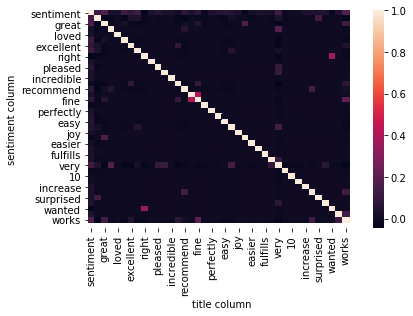

In [5]:
sns.heatmap(amz.corr())
plt.xlabel('title column')
plt.ylabel('sentiment column')
plt.show()

In [6]:
# Build out our training data before running the model
data = amz[keywords + ['allcaps']]
target = amz['sentiment']

In [7]:
# use the BernoulliNB classifier
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 321


In [8]:
# Attempt to use the Confusion Matrix here
from sklearn.metrics import confusion_matrix
#y_pred = bnb.fit(data, target).predict(data)
#newdata = amz['no'] + amz['allcaps']
y_pred = bnb.predict(data)
confusion_matrix(target, y_pred)

array([[454,  46],
       [275, 225]], dtype=int64)

In [9]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=30)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.668
Testing on Sample: 0.679


In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.71, 0.61, 0.74, 0.62, 0.68, 0.64, 0.67, 0.7 , 0.68, 0.61])

Overfitting is when my model is so complex that it starts to catch noises.  My classifiers are not deviating in anyway, so this means it is not overfitting.  The relationship shown in the graph is showing a very strong relationship between multiple variables, in the assumption that any pair of variables are independent from each other.

In the array, we see that 275 of our 500 errors are failing to identify positive comments made on Amazon (false negative that is a Type 2 Error or a miss) .  We have a 46 that is a Type 1 Error, or a false alarm.  We have a 225 as a sensitivity, which is a 45%.  And we have a 90.8% specificity.

Our 20% holdout number and testing on sample number is relatively the same, which means there they are pretty consistent.  However, the numbers are low, so there is a chance that the model is actually overfitting.  We can also see that the array at the bottom had an overall low 70% range.